Loading circuits with encoding: ISO-8859-1
Loading constructor_results with encoding: ascii
Loading constructor_standings with encoding: ascii
Loading constructors with encoding: ascii
Loading driver_standings with encoding: ascii
Loading drivers with encoding: MacRoman
Loading lap_times with encoding: ascii
Loading pit_stops with encoding: ascii
Loading qualifying with encoding: ascii
Loading races with encoding: ascii
Loading results with encoding: ascii
Loading seasons with encoding: ascii
Loading status with encoding: ascii

Dataset: circuits
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   73 non-null     int64  
 1   circuitRef  73 non-null     object 
 2   name        73 non-null     object 
 3   location    73 non-null     object 
 4   country     73 non-null     object 
 5   lat         73 non-null     float64
 6   lng         

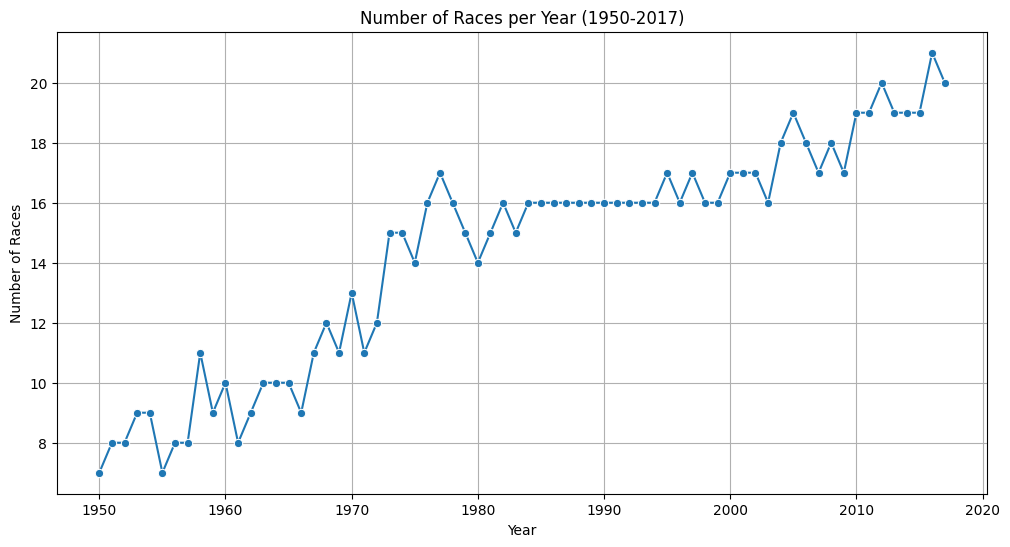

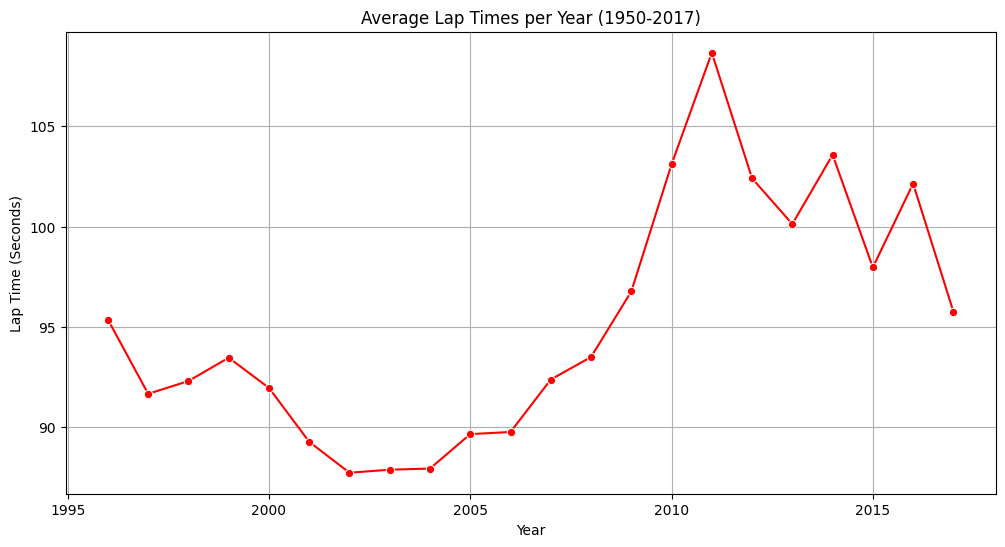

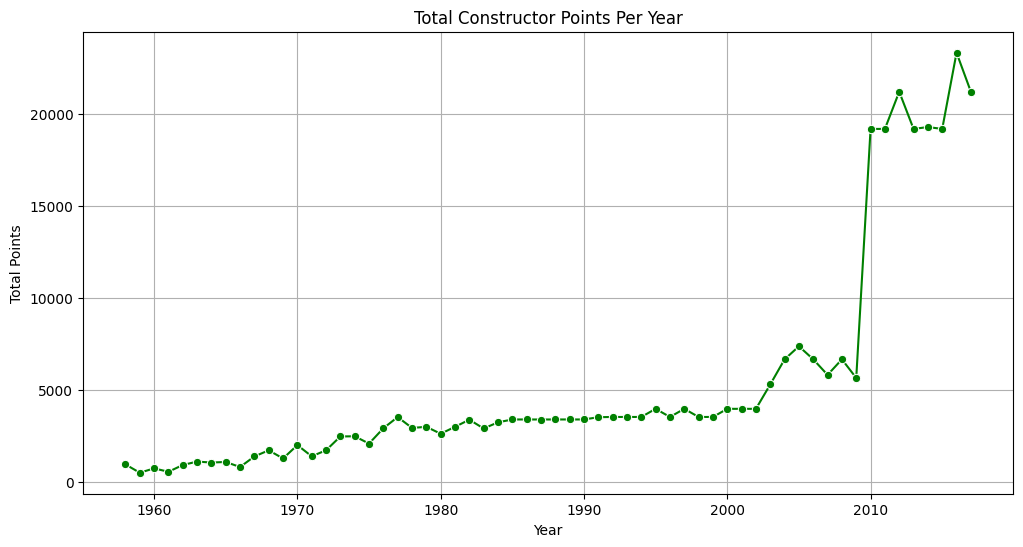

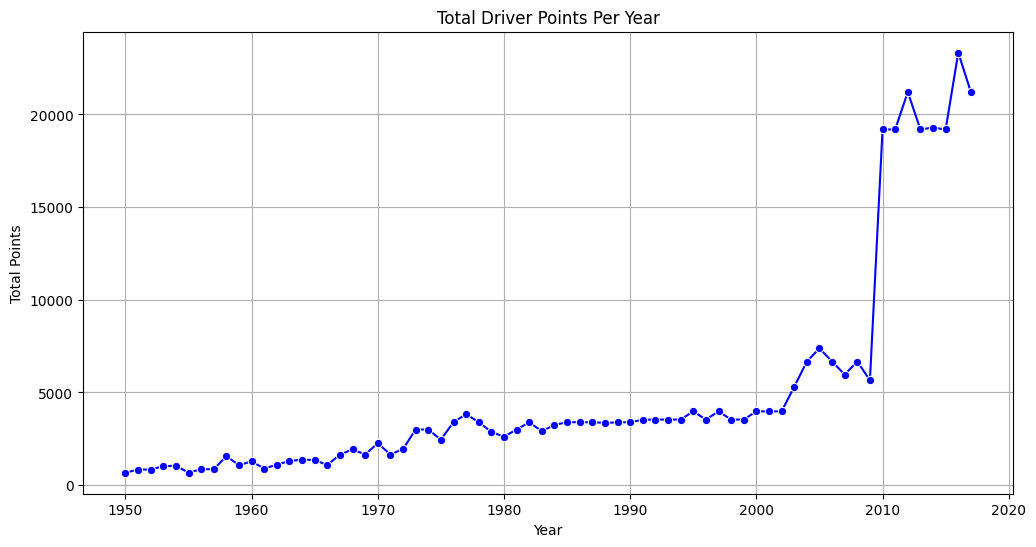


📊 Key Insights:
- The number of races per year has steadily increased.
- Average lap times have decreased, showing technological improvements.
- Total points of constructors and drivers show performance trends over time.


In [7]:
# Formula 1 Dataset Analysis (1950-2017)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

# Define file paths
file_paths = {
    "circuits": "circuits.csv",
    "constructor_results": "constructorResults.csv",
    "constructor_standings": "constructorStandings.csv",
    "constructors": "constructors.csv",
    "driver_standings": "driverStandings.csv",
    "drivers": "drivers.csv",
    "lap_times": "lapTimes.csv",
    "pit_stops": "pitStops.csv",
    "qualifying": "qualifying.csv",
    "races": "races.csv",
    "results": "results.csv",
    "seasons": "seasons.csv",
    "status": "status.csv"
}

# Detect encoding and load CSV files
dfs = {}
for name, path in file_paths.items():
    with open(path, "rb") as f:
        raw_data = f.read(10000)  # Read a chunk to detect encoding
        encoding = chardet.detect(raw_data)['encoding']
        print(f"Loading {name} with encoding: {encoding}")
    dfs[name] = pd.read_csv(path, encoding=encoding, low_memory=False)

# Remove 'url' columns from datasets if they exist
for name, df in dfs.items():
    if "url" in df.columns:
        dfs[name] = df.drop(columns=["url"])

# Display dataset details
for name, df in dfs.items():
    print(f"\nDataset: {name}")
    print(df.info(), "\n")
    print(df.head(), "\n")

# Merge race results with races and drivers
race_results = dfs["results"].merge(dfs["races"], on="raceId")
race_results = race_results.merge(dfs["drivers"], on="driverId")

# Convert race year to datetime
race_results["year"] = pd.to_datetime(race_results["date"]).dt.year

# 1️ **Number of Races per Year**
races_per_year = race_results.groupby("year")["raceId"].nunique()
plt.figure(figsize=(12, 6))
sns.lineplot(x=races_per_year.index, y=races_per_year.values, marker="o")
plt.title("Number of Races per Year (1950-2017)")
plt.xlabel("Year")
plt.ylabel("Number of Races")
plt.grid(True)
plt.show()

# 2️ **Average Lap Times per Year**
lap_times = dfs["lap_times"].merge(dfs["races"], on="raceId")
lap_times["year"] = lap_times["date"].apply(lambda x: int(x[:4]))  # Extract year
avg_lap_times = lap_times.groupby("year")["milliseconds"].mean() / 1000  # Convert to seconds
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_lap_times.index, y=avg_lap_times.values, marker="o", color="red")
plt.title("Average Lap Times per Year (1950-2017)")
plt.xlabel("Year")
plt.ylabel("Lap Time (Seconds)")
plt.grid(True)
plt.show()

# 3️ **Constructors Standings Over Time (Without 'name' column)**
constructor_standings = dfs["constructor_standings"].merge(dfs["constructors"], on="constructorId")
constructor_standings = constructor_standings.merge(dfs["races"], on="raceId")
constructor_standings["year"] = constructor_standings["date"].apply(lambda x: int(x[:4]))
top_teams = constructor_standings.groupby("year")["points"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=top_teams["year"], y=top_teams["points"], marker="o", color="green")
plt.title("Total Constructor Points Per Year")
plt.xlabel("Year")
plt.ylabel("Total Points")
plt.grid(True)
plt.show()

# 4️ **Driver Standings Over Time (Without 'name' column)**
driver_standings = dfs["driver_standings"].merge(dfs["drivers"], on="driverId")
driver_standings = driver_standings.merge(dfs["races"], on="raceId")
driver_standings["year"] = driver_standings["date"].apply(lambda x: int(x[:4]))
top_drivers = driver_standings.groupby("year")["points"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=top_drivers["year"], y=top_drivers["points"], marker="o", color="blue")
plt.title("Total Driver Points Per Year")
plt.xlabel("Year")
plt.ylabel("Total Points")
plt.grid(True)
plt.show()

#  **Summary of Findings**
print("\n Key Insights:")
print("- The number of races per year has steadily increased.")
print("- Average lap times have decreased, showing technological improvements.")
print("- Total points of constructors and drivers show performance trends over time.")
